# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [17]:
#Internal: Determine whether a zoom value is valid or not
def _is_zoom(zoom_val):
    if zoom_val[0] > 0 or zoom_val[1] > 0:
        return zoom_val
    else:
        return False
        
def weather_plot(plot_name, axis_x, axis_y, title, labelx, labely, zoom_x, zoom_y):
    fig, plot_name = plt.subplots(figsize=(8,5))
    fig.suptitle(title, fontsize='14')
    
    axis_xs = axis_x
    axis_xs_mean = axis_xs.mean()
    axis_ys = axis_y

    plot_name.scatter(axis_xs, axis_ys, color='steelblue', marker='o', edgecolors='black')
    plot_name.grid()
    plot_name.set_xlabel(labelx)
    plot_name.set_ylabel(labely)
    try:
        if list(_is_zoom(zoom_x)):
            plot_name.set_xlim(zoom_x)
    except:
        pass
    
    try:
        if list(_is_zoom(zoom_y)):
            plot_name.set_ylim(zoom_y)
    except:
        pass
    #plot_name.set_xlim([60,105])
    plot_name.legend(loc='best')
    
    plt.savefig('figures/' + str(title.replace(' ','_')) + '.png')
    return plt.show()

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
_api_city = []
_api_cloudiness = []
_api_country = []
_api_date = []
_api_humidity = []
_api_lat = []
_api_lng = []
_api_max_temp = []
_api_wind_speed = []
_api_cities_dict = {}

_open_weather_url = 'https://api.openweathermap.org/data/2.5/weather?'
print('Beginning Data Retrieval\n-----------------------------')
for i in cities:
    _query_url = _open_weather_url + 'q='+i+'&appid='+api_key
    _api_data = requests.get(_query_url).json()
    if(_api_data['cod'] == 200):
        print("Retrieving data from " + str(i))
        _api_city.append(i)
        _api_cloudiness.append(_api_data['clouds']['all'])
        _api_country.append(_api_data['sys']['country'])
        _api_date.append(_api_data['dt'])
        _api_humidity.append(_api_data['main']['humidity'])
        _api_lat.append(_api_data['coord']['lat'])
        _api_lng.append(_api_data['coord']['lon'])
        _api_max_temp.append(_api_data['main']['temp_max'])
        _api_wind_speed.append(_api_data['wind']['speed'])
    else:
        print(str(i) + ' not found. Skipping...' )


Beginning Data Retrieval
-----------------------------
Retrieving data from santa maria
Retrieving data from coihaique
Retrieving data from tweed
belushya guba not found. Skipping...
Retrieving data from hilo
Retrieving data from usinsk
Retrieving data from havoysund
Retrieving data from tongliao
Retrieving data from eufaula
Retrieving data from sayyan
attawapiskat not found. Skipping...
Retrieving data from bredasdorp
Retrieving data from rikitea
Retrieving data from ponta do sol
Retrieving data from tasiilaq
konigslutter not found. Skipping...
nizhneyansk not found. Skipping...
Retrieving data from lebu
Retrieving data from naron
Retrieving data from gillette
Retrieving data from elizabeth city
Retrieving data from labytnangi
Retrieving data from bintulu
Retrieving data from husavik
Retrieving data from punta arenas
Retrieving data from jalu
Retrieving data from cidreira
warqla not found. Skipping...
Retrieving data from carnarvon
Retrieving data from atuona
grand river south east no

Retrieving data from avarua
Retrieving data from matay
Retrieving data from ginir
Retrieving data from namibe
Retrieving data from kati
Retrieving data from mbuji-mayi
Retrieving data from fereydun kenar
Retrieving data from bonfim
kushmurun not found. Skipping...
Retrieving data from zeya
Retrieving data from waipawa
Retrieving data from guerrero negro
Retrieving data from oktyabrskiy
Retrieving data from mahibadhoo
Retrieving data from pailon
moyo not found. Skipping...
Retrieving data from mahon
Retrieving data from high level
Retrieving data from haines junction
Retrieving data from matagami
Retrieving data from leningradskiy
Retrieving data from ternate
Retrieving data from saint-philippe
Retrieving data from nadadores
Retrieving data from pyapon
Retrieving data from mednogorskiy
Retrieving data from clyde river
Retrieving data from masvingo
Retrieving data from carahue
Retrieving data from ponta delgada
mahadday weyne not found. Skipping...
Retrieving data from tamasopo
Retrievin

Retrieving data from qianjiang
Retrieving data from lahan
Retrieving data from parabel
Retrieving data from merauke
Retrieving data from novyy urengoy
Retrieving data from yining
Retrieving data from minas
asau not found. Skipping...
Retrieving data from hanzhong
Retrieving data from mengcheng
Retrieving data from changde
rawannawi not found. Skipping...
Retrieving data from tabas
Retrieving data from warrington
Retrieving data from boueni
Retrieving data from pontianak
hvammstangi not found. Skipping...
Retrieving data from gamba
pilao arcado not found. Skipping...
Retrieving data from batagay-alyta
Retrieving data from sept-iles
eldikan not found. Skipping...
Retrieving data from sitka
Retrieving data from tabou
Retrieving data from maceio
Retrieving data from shumskiy
fillira not found. Skipping...
Retrieving data from nouadhibou
Retrieving data from roald
burica not found. Skipping...
Retrieving data from ahuimanu
Retrieving data from bahia blanca
Retrieving data from kingman
Retri

In [6]:
_api_cities_dict = list(zip(_api_city, _api_cloudiness, _api_country, _api_date, _api_humidity, _api_lat, _api_lng, _api_max_temp,_api_wind_speed))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
_openweather_info_df = pd.DataFrame(_api_cities_dict,
                                   columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])

In [8]:
_openweather_info_df.to_csv(output_data_file)
_openweather_info_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,santa maria,0,BR,1563466617,53,-16.02,-48.01,298.150,5.70
1,coihaique,75,CL,1563466618,80,-45.58,-72.07,279.150,3.60
2,tweed,75,CA,1563466618,73,44.48,-77.31,301.480,2.60
3,hilo,75,US,1563466619,73,19.71,-155.08,295.370,2.10
4,usinsk,100,RU,1563466619,92,66.00,57.56,283.102,8.65


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

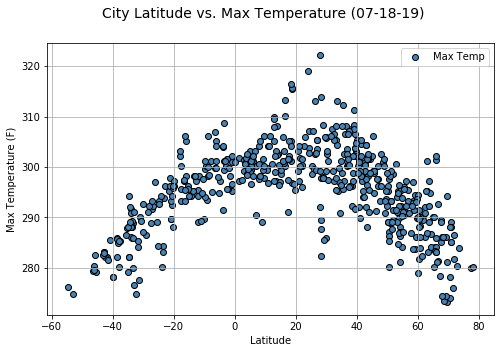

In [29]:
weather_plot('lat_vs_temperature', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Max Temp'], 
             'City Latitude vs. Max Temperature (07-18-19)', 
             'Latitude', 
             'Max Temperature (F)', [0,0],[0,0])

#### Latitude vs. Humidity Plot

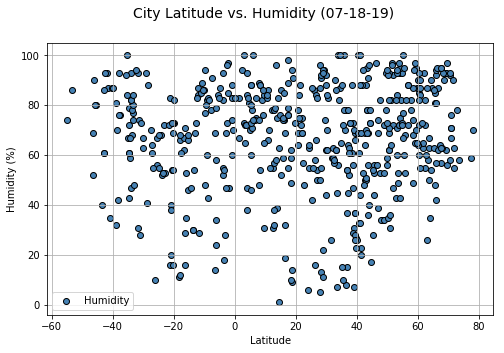

In [23]:
weather_plot('lat_vs_humidity', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Humidity'], 
             'City Latitude vs. Humidity (07-18-19)', 
             'Latitude', 
             'Humidity (%)', [0,0],[0,0])

#### Latitude vs. Cloudiness Plot

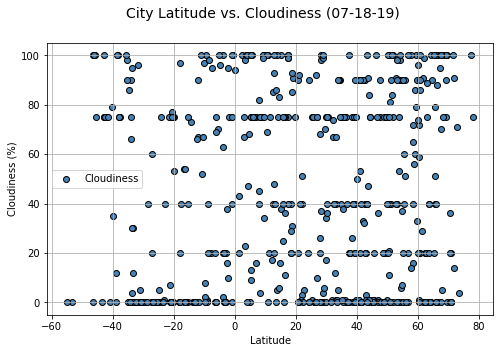

In [24]:
weather_plot('lat_vs_cloudiness', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Cloudiness'], 
             'City Latitude vs. Cloudiness (07-18-19)', 
             'Latitude', 
             'Cloudiness (%)', [0,0],[0,0])

#### Latitude vs. Wind Speed Plot

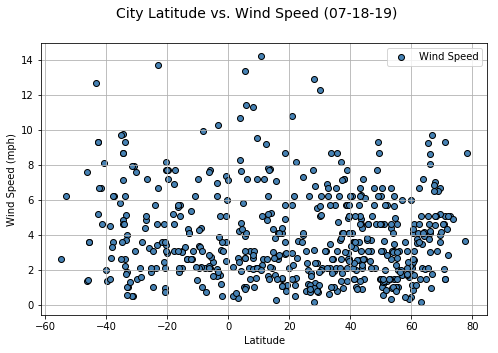

In [31]:
weather_plot('lat_vs_wind_speed', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Wind Speed'], 
             'City Latitude vs. Wind Speed (07-18-19)', 
             'Latitude', 
             'Wind Speed (mph)', [0,0],[0,0])

# Insights

* Max Temperature is related with latitud in the north of the planet. More closer to latitud more high temperature.
* Humidity is clearly present in north side and it increase in countries thar are far away to latitud.
* Cloudiness is present and constant. Definitly has not relation with latitude. However Cloudiness has the same behaviour than Humidity, mostly present in the north side.
* Wind speed's slow when you're close to latitud and increse going to north. 

# Conclusions
* Countries in the north has more diversity around Max Temperature, Humidity, Cloudiness and Wind speed. 